In [4]:
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np   
import pandas as pd
import scipy as sp

import arc 
import arc.beta as beta

In [5]:
#define atom for ARC
atom = arc.Ytterbium174()

This is to caliculate the 171 Yb energy structure including higpower fine structure. I will copy the method of Ding 2018 (https://arxiv.org/pdf/1808.05987.pdf). Arc is used for the $^{171}$Yb quantum defect data.

In [85]:
""" 
constants
"""
I = 9/2 #nuclear spin
a = -4.156e-6 #highpower fine coupling constant[eV] corresponding to 1GHz

deltaE = 2*np.pi*12.6428121e9 #GHz the spliting of 171Yb+
Rinf = con.physical_constants['Rydberg constant times c in Hz'][0] 
au = con.physical_constants['atomic mass constant'][0] 

m_Sr88 = 87.90561*au #mass of 88Sr [kg] from NIST database
m_Sr87 = 86.90887749*au #mass of 87Sr [kg] from NIST database

m_e = 9.1093837015e-31 #mass of electron [kg]
#electron reduced mass 
#(this would be a bit rigolus. to make it rigolas I should use ion mass?)
m88 = m_e*(m_Sr88-m_e)/m_Sr88
m87 = m_e*(m_Sr87-m_e)/m_Sr87

#conversion from Hz to cm-1
Hztocmm1 = 1/con.c/1e2

deltaE = 12.6428121e9 #Hz the spliting of 171Yb+
# E0Sr = 45932.09/Hztocmm1 #Hz 

E0Sr = 45932.1943/Hztocmm1 #Hz 

In [86]:
m_Sr88

1.4597069957830362e-25

In [87]:
1/2*a*I*241799

-2.2610624489999998

In [88]:
def QuantumDefect3S1(n):
    return 3.3707725 + 0.41979/(n-3.3707725)**2 -0.421377/(n-3.3707725)**4 
    # return 3.37065 + 0.443/(n-3.37065)**2 -0.553/(n-3.37065)**4

def Sr88Energy3S1(n):
    return E0Sr-Rinf*m88/m_e/ ((n -  QuantumDefect3S1(n))**2) #Hz

def Sr87Energy3S1(n):
    #(m171/m_e)*Rinf
    return E0Sr- Rinf*m87/m_e/ ((n -  QuantumDefect3S1(n))**2)+ 1/2*a*I*241799*1e9 #Hz


Currently ARC does not cover this thompson paper and this transtion, so I will make the function by my self.

# 88Sr energy for sanity check

ARC provides experimentally determined quantum defect data for $^{174}$Sr using multiple references. (https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/_modules/arc/divalent_atom_data.html#Strontium88.getPressure)

In [75]:
N=np.arange(30,100,1)

#quantum defect data import for 88Sr
Sr3S1_qd = QuantumDefect3S1(N)

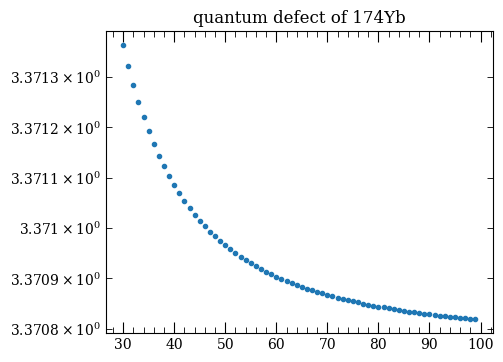

In [76]:
#plot
fig, axes = plt.subplots(1, 1, figsize=(5,4), dpi=100)
plt.title('quantum defect of 174Yb')
axes.semilogy(N,Sr3S1_qd,'.',label="$n{}^3S_{1}$")

plt.show()

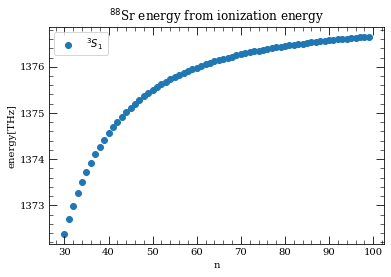

In [77]:
plt.scatter(N,Sr88Energy3S1(N)/1e12, label= '$^3S_1$ ')

plt.title('$^{88}$Sr energy from ionization energy')
plt.xlabel('n')
plt.ylabel('energy[THz]')

plt.legend()
plt.show()

# Calculation of the energy of 87Sr

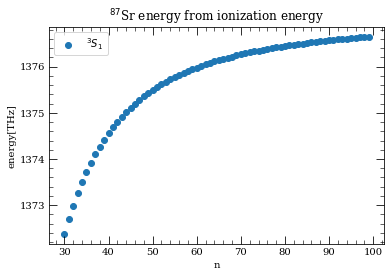

In [78]:
plt.scatter(N,Sr87Energy3S1(N)/1e12, label= '$^3S_1$ ')

plt.title('$^{87}$Sr energy from ionization energy')
plt.xlabel('n')
plt.ylabel('energy[THz]')

plt.legend()
plt.show()

concentrate on n = 74

In [89]:
print('***Calculated value from quantum defect of  87 Sr 6s74s3S1: {} THz'.format((Sr87Energy3S1(74)/1e12)))
print('***exp value                                87 Sr 6s74s3S1: {} THz'.format((45910.1236)/Hztocmm1/1e12))
print('***paper theory value                       87 Sr 6s74s3S1: {} THz'.format((45910.1213)/Hztocmm1/1e12))

***Calculated value from quantum defect of  87 Sr 6s74s3S1: 1376.3507977583029 THz
***exp value                                87 Sr 6s74s3S1: 1376.350880112781 THz
***paper theory value                       87 Sr 6s74s3S1: 1376.3508111605156 THz


In [90]:
diff74 = Sr87Energy3S1(74) - (45910.1236)/Hztocmm1
print(diff74/1e9)

-0.08235447825


In [81]:
print('***Calculated value from quantum defect of  87 Sr 6s50s3S1: {} THz'.format(((Sr87Energy3S1(50)-diff74)/1e12)))
print('***exp value                                87 Sr 6s50s3S1: {} THz'.format((45881.6510)/Hztocmm1/1e12))
print('***paper theory value                       87 Sr 6s50s3S1: {} THz'.format((45881.6488)/Hztocmm1/1e12))

***Calculated value from quantum defect of  87 Sr 6s50s3S1: 1375.497292856651 THz
***exp value                                87 Sr 6s50s3S1: 1375.4972930388158 THz
***paper theory value                       87 Sr 6s50s3S1: 1375.4972270844753 THz


# C6 scaling calculation

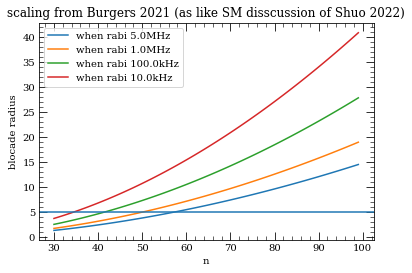

In [161]:
C6 = 15e9 #um^6
def Rb(Omega, n ):
    return (C6/Omega*2*np.pi*((n-4.439)/(50-4.439))**11)**(1/6)

Omega = 2*np.pi*5e6 #1MHz

plt.plot(N,Rb(Omega, N),label='when rabi {}MHz'.format(Omega/(2*np.pi)*1e-6))
plt.xlabel('n')
plt.ylabel('blocade radius')

Omega = 2*np.pi*1e6 #1MHz

plt.plot(N,Rb(Omega, N),label='when rabi {}MHz'.format(Omega/(2*np.pi)*1e-6))
plt.xlabel('n')
plt.ylabel('blocade radius')

Omega = 2*np.pi*1e5 #1MHz

plt.plot(N,Rb(Omega, N),label='when rabi {}kHz'.format(Omega/(2*np.pi)*1e-3))
plt.xlabel('n')
plt.ylabel('blocade radius')

Omega = 2*np.pi*1e4 #1MHz

plt.plot(N,Rb(Omega, N),label='when rabi {}kHz'.format(Omega/(2*np.pi)*1e-3))
plt.xlabel('n')
plt.ylabel('blocade radius')

plt.legend()
plt.title('scaling from Burgers 2021 (as like SM disscussion of Shuo 2022)')

plt.axhline(y=5)